# Prediction Using Simple Linear Regression From Scratch

#### Made By : Mayank Kirola (Data Science And Analytics Intern at The Sparks Foundation) #GRIPMAY2022

Regression models describe the relationship between variables by fitting a line to the observed data. 

Linear regression models use a straight line, while logistic and nonlinear regression models use a curved line.

##### Importing Functions

Pandas - Pandas is a library used to analyze data.

Math - Math module is a built-in library which contains important mathematical Functions.

Matplotlib - It is a library used to plot graphs.

sklearn - Sklearn(Scikit-learn) is the most useful library for machine learning in Python.

In [1]:
from math import sqrt
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

##### Reading Data

Reading data from "score.csv" and assigning values to Variables.

In [2]:
data = pd.read_csv("score.csv")

Checking the format of the data.

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
dataset = data.values
X = [row[0] for row in dataset]
Y = [row[1] for row in dataset]

## Defining Required Functions

#### Mean : sum of values / number of values

In [5]:
def mean(values):
    return sum(values) / float(len(values))

#### Variance : sum ((x-mean(x))^2 )

In [6]:
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

#### Covariance : sum((x - mean(x)) * (y - mean(y)))

In [7]:
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

### Coefficients :
#### B1 = Covariance(x,y) / Variance(x)
#### B0 = mean(y) - B1 * mean(x)

In [8]:
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

#### Using yhat(prediction) = B0(constant) + B1(Slope) * row[0] (x) or Y=MX + C

This is simple Stright line equation.

In [9]:
def simple_linear_regression(train, test):
    predictions = []
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions

#### RMSE (Root Mean Square Error) : (sum((predicted - actual)^2) / number of values)^(1/2)

In [10]:
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

In [11]:
def evaluate_algorithm(dataset, algorithm):
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(dataset, test_set)
    actual = [row[-1] for row in dataset]
    rmse = rmse_metric(actual, predicted)
    return rmse

### Finding Root Mean Square Error

In [12]:
rmse = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))

RMSE: 5.374


#### Checking Relevancy of our model

In [13]:
Y_pred = [simple_linear_regression(dataset,[[p]]) for p in X]

In [14]:
r2_score(Y_pred,Y)*100

95.06250148245327

Our model's relevancy is 95%.


#### Plotting graph showing actual values and predicted values

This Graph is created using matplotlib library.

In [15]:
def graph(dataset):
    X = [row[0] for row in dataset]
    Y = [row[1] for row in dataset]
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plt.show()
    

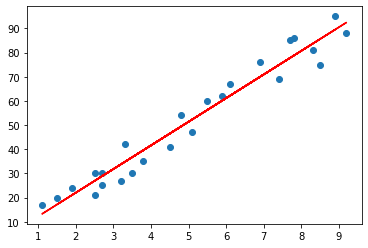

In [16]:
graph(dataset)

## Question


### What will be the predicted score if a student studies for 9.25hrs/day?

In [17]:
simple_linear_regression(dataset, [[9.25]])

[92.90985477015732]

 According To our algorithm, a student will get 92.9 points if he Studies For 9.25hrs/day. 